In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/danielpace/Documents/Fide Partners Interview/Data/emerging_data_center_markets.csv")
print(df.head())

        Country  Market Demand (Internet Users, millions)  \
0         India                                       743   
1  Saudi Arabia                                        33   
2        Brazil                                       165   
3        Mexico                                        96   
4     Indonesia                                       212   

   Infrastructure Readiness (Electricity Access, %)  \
0                                              99.0   
1                                             100.0   
2                                             100.0   
3                                             100.0   
4                                              98.0   

   Cost & Viability (Electricity Cost, USD per kWh)  \
0                                              0.08   
1                                              0.05   
2                                              0.12   
3                                              0.09   
4                          

In [6]:
# Create an investment score proxy (this will be replaced by the regression model later)
df["Investment Score"] = (
    (df["Market Demand (Internet Users, millions)"] * 0.3) +
    (df["Infrastructure Readiness (Electricity Access, %)"] * 0.25) -
    (df["Cost & Viability (Electricity Cost, USD per kWh)"] * 0.3) +
    (df["Risk (Political Stability Index, -2.5 to 2.5)"] * 0.15)
)

# Print the updated dataframe
print(df[["Country", "Investment Score"]])

        Country  Investment Score
0         India           247.491
1  Saudi Arabia            34.900
2        Brazil            74.404
3        Mexico            53.698
4     Indonesia            87.980
5  South Africa            32.578


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Select independent variables (X) and dependent variable (Y)
X = df[[
    "Market Demand (Internet Users, millions)",
    "Infrastructure Readiness (Electricity Access, %)",
    "Cost & Viability (Electricity Cost, USD per kWh)",
    "Risk (Political Stability Index, -2.5 to 2.5)"
]]

Y = df["Investment Score"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"Model R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Model R² Score: 1.0000
Mean Absolute Error: 0.0332


In [8]:
# Predict scores for all countries
df["Predicted Investment Score"] = model.predict(X)

# Rank the countries based on the predicted score
df = df.sort_values(by="Predicted Investment Score", ascending=False)

# Assign ranking
df["Rank"] = range(1, len(df) + 1)

# Display the final rankings
print(df[["Country", "Predicted Investment Score", "Rank"]])

        Country  Predicted Investment Score  Rank
0         India                  247.459842     1
4     Indonesia                   87.980000     2
2        Brazil                   74.404000     3
3        Mexico                   53.698000     4
1  Saudi Arabia                   34.864822     5
5  South Africa                   32.578000     6


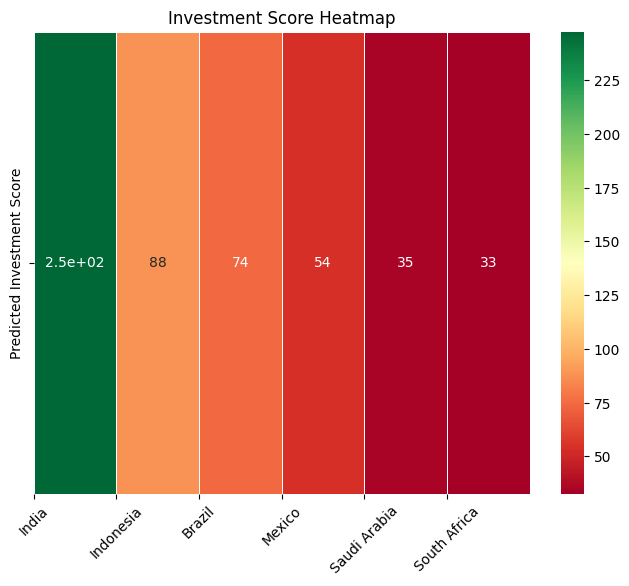

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of scores
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["Predicted Investment Score"]].T, 
    annot=True, 
    cmap="RdYlGn",
    linewidths=0.5
)

plt.title("Investment Score Heatmap")
plt.xticks(range(len(df)), df["Country"], rotation=45)
plt.show()

In [10]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 24.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 26.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


2025-02-19 00:23:34.339 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.381 
  command:

    streamlit run /opt/anaconda3/envs/myenv/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-02-19 00:23:34.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 00:23:34.383 Thread 'Mai

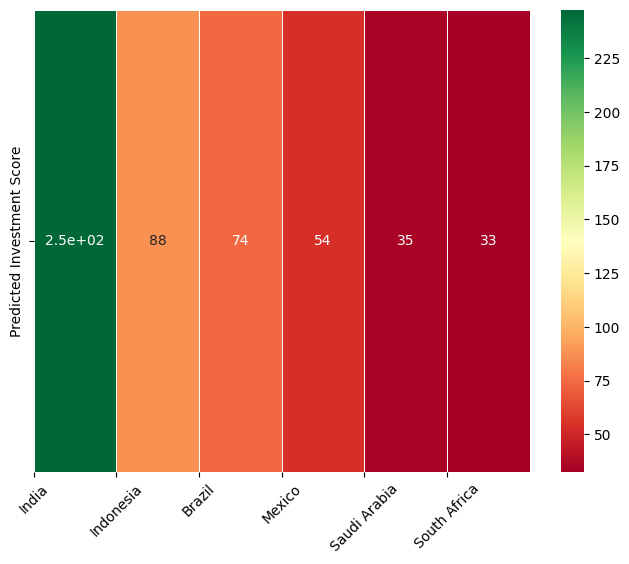

In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/Users/danielpace/Documents/Fide Partners Interview/Data/emerging_data_center_markets.csv")

# Define independent variables (X) and dependent variable (Y)
X = df[[
    "Market Demand (Internet Users, millions)",
    "Infrastructure Readiness (Electricity Access, %)",
    "Cost & Viability (Electricity Cost, USD per kWh)",
    "Risk (Political Stability Index, -2.5 to 2.5)"
]]

# Generate a proxy Investment Score
df["Investment Score"] = (
    (df["Market Demand (Internet Users, millions)"] * 0.3) +
    (df["Infrastructure Readiness (Electricity Access, %)"] * 0.25) -
    (df["Cost & Viability (Electricity Cost, USD per kWh)"] * 0.3) +
    (df["Risk (Political Stability Index, -2.5 to 2.5)"] * 0.15)
)

# Train regression model
model = LinearRegression()
model.fit(X, df["Investment Score"])
df["Predicted Investment Score"] = model.predict(X)

# Rank the countries
df = df.sort_values(by="Predicted Investment Score", ascending=False)
df["Rank"] = range(1, len(df) + 1)

# Streamlit UI
st.title("🏗️ Emerging Data Center Markets Dashboard")
st.sidebar.header("🔧 Adjust Inputs")

# Sidebar Inputs
market_demand = st.sidebar.slider("Market Demand (Internet Users, millions)", 0, 800, 100)
infra_readiness = st.sidebar.slider("Infrastructure Readiness (Electricity Access, %)", 50, 100, 90)
cost_viability = st.sidebar.slider("Electricity Cost (USD per kWh)", 0.01, 0.20, 0.10)
risk_index = st.sidebar.slider("Political Stability Index (-2.5 to 2.5)", -2.5, 2.5, 0.0)

# Predict score for user input
user_input = np.array([[market_demand, infra_readiness, cost_viability, risk_index]])
user_pred_score = model.predict(user_input)[0]

st.sidebar.subheader("📊 Predicted Investment Score:")
st.sidebar.write(f"**{user_pred_score:.2f}**")

# Display rankings
st.subheader("🌍 Market Rankings")
st.dataframe(df[["Country", "Predicted Investment Score", "Rank"]])

# Heatmap visualization
st.subheader("🔥 Market Heatmap")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df[["Predicted Investment Score"]].T, 
    annot=True, 
    cmap="RdYlGn",
    linewidths=0.5
)
plt.xticks(range(len(df)), df["Country"], rotation=45)
st.pyplot(fig)

# Insights
st.subheader("📌 Key Insights")
top_countries = df.head(3)["Country"].tolist()
st.write(f"✅ **Top Investment Markets:** {', '.join(top_countries)}")
st.write("🔹 Higher scores indicate stronger demand, infrastructure, and cost efficiency.")
st.write("⚠️ Lower scores suggest challenges such as high costs or infrastructure gaps.")

# Footer
st.write("---")
st.write("📍 *Built with ❤️ using Streamlit*")

In [16]:
!pip install plotly

  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
Using cached plotly-6.0.0-py3-none-any.whl (14.8 MB)


In [20]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("Data/emerging_data_center_markets.csv")

# Streamlit UI Setup
st.set_page_config(page_title="🌍 Data Center Market Dashboard", layout="wide")

# ---- SIDEBAR ----
st.sidebar.title("🔧 Adjust Investment Criteria")
st.sidebar.subheader("🎯 Set Your Priorities")

# User-defined weights for each criterion
market_demand_weight = st.sidebar.slider("Market Demand Weight", 0.0, 1.0, 0.3)
infra_readiness_weight = st.sidebar.slider("Infrastructure Readiness Weight", 0.0, 1.0, 0.25)
cost_viability_weight = st.sidebar.slider("Cost & Viability Weight", 0.0, 1.0, 0.3)
risk_index_weight = st.sidebar.slider("Political Stability Weight", 0.0, 1.0, 0.15)

# Normalize weights to sum up to 1
total_weight = (market_demand_weight + infra_readiness_weight + cost_viability_weight + risk_index_weight)
if total_weight == 0:
    total_weight = 1  # Prevent division by zero if all weights are zero

market_demand_weight /= total_weight
infra_readiness_weight /= total_weight
cost_viability_weight /= total_weight
risk_index_weight /= total_weight

# ---- DYNAMIC SCORING ----
# Scale the data for consistency in scoring
scaler = MinMaxScaler()

df['Market Demand Score'] = scaler.fit_transform(df[['Market Demand (Internet Users, millions)']])
df['Infrastructure Readiness Score'] = scaler.fit_transform(df[['Infrastructure Readiness (Electricity Access, %)']])
df['Cost & Viability Score'] = 1 - scaler.fit_transform(df[['Cost & Viability (Electricity Cost, USD per kWh)']])
df['Political Stability Score'] = scaler.fit_transform(df[['Risk (Political Stability Index, -2.5 to 2.5)']])

# Calculate dynamic investment score based on user weights
df['Dynamic Investment Score'] = (
    (df['Market Demand Score'] * market_demand_weight) +
    (df['Infrastructure Readiness Score'] * infra_readiness_weight) +
    (df['Cost & Viability Score'] * cost_viability_weight) +
    (df['Political Stability Score'] * risk_index_weight)
)

# Rank the countries based on the dynamic score
df = df.sort_values(by='Dynamic Investment Score', ascending=False)
df['Rank'] = range(1, len(df) + 1)

# ---- MAIN PAGE ----
st.title("🚀 Emerging Data Center Market Dashboard")

# ---- MARKET RANKINGS ----
st.subheader("🌍 Market Rankings")
fig = px.bar(df, x="Country", y="Dynamic Investment Score", text="Rank", color="Dynamic Investment Score",
             color_continuous_scale="RdYlGn", title="Market Investment Score by Country")
st.plotly_chart(fig, use_container_width=True)

# ---- HEATMAP VISUALIZATION ----
st.subheader("🔥 Market Heatmap")
heatmap_data = df.pivot(index="Country", columns="Rank", values="Dynamic Investment Score")
fig_heatmap = px.imshow(heatmap_data, color_continuous_scale="RdYlGn", title="Dynamic Investment Score Heatmap")
st.plotly_chart(fig_heatmap, use_container_width=True)

# ---- BEST INVESTMENT LOCATION ----
st.subheader("💡 Best Investment Recommendation")
top_country = df.iloc[0]["Country"]
top_score = df.iloc[0]["Dynamic Investment Score"]

st.success(f"🏆 **{top_country}** is the best investment destination based on your criteria with a score of **{top_score:.2f}**!")

# ---- COUNTRY COMPARISON ----
st.subheader("📊 Compare Countries Based on Your Criteria")
selected_countries = st.multiselect("Select countries to compare", df["Country"].unique(), default=df["Country"].unique())

filtered_df = df[df["Country"].isin(selected_countries)]
fig_comp = px.line(filtered_df, x="Country", y="Dynamic Investment Score", markers=True, 
                   title="Comparison of Dynamic Investment Scores")
st.plotly_chart(fig_comp, use_container_width=True)

# ---- INSIGHTS ----
st.subheader("🔍 Key Takeaways")
st.write("🎯 **Adaptable Investment Strategy:** The best market changes based on your specific priorities.")
st.write("📈 **Dynamic Scoring Model:** Real-time updates to rankings and scores based on user-defined weights.")
st.write("💡 **Personalized Insights:** The dashboard provides tailored investment recommendations.")

# Footer
st.markdown("---")
st.markdown("📍 *Built with ❤️ using Streamlit & Plotly*")

2025-02-19 14:59:30.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-19 14:59:30.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()